In [1]:
import sys
sys.path.append("../")
from Data import DataLoader as dl
from Features import PriceSeriesFeatures as psf
from Features import ClassifiedSeriesFeatures as csf
from Features import RelationalSeriesFeatures as rsf
from Features import SeriesFilter as sf
from Features import FeatureAnalysis as fa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
aapl = dl.load_data("AAPL")
tsla = dl.load_data("TSLA")

aapl_series = aapl["close"].loc['2020-01-01':]
tsla_series = tsla["close"].loc['2020-01-01':]

## **Unscaled Smoothed-like Series Features**

In [3]:
# rolling_average = psf.average_features(aapl_series, 5)
# rolling_median = psf.median_features(aapl_series, 5)
# rolling_minimum = psf.minimum_features(aapl_series, 5)
# rolling_maximum = psf.maximum_features(aapl_series, 5)

In [4]:
# _ = fa.feature_data(feature_series=rolling_average)
# _ = fa.feature_distribution(feature_series=rolling_average, feature_name="Rolling Average")

# _ = fa.feature_data(feature_series=rolling_median)
# _ = fa.feature_distribution(feature_series=rolling_median, feature_name="Rolling Median")

# _ = fa.feature_data(feature_series=rolling_minimum)
# _ = fa.feature_distribution(feature_series=rolling_minimum, feature_name="Rolling Minimum")

# _ = fa.feature_data(feature_series=rolling_maximum)
# _ = fa.feature_distribution(feature_series=rolling_maximum, feature_name="Rolling Maximum")

## **Returns Distribution Features**

In [5]:
# rolling_vol = psf.volatility_features(aapl_series, 5)
# roling_skew = psf.skewness_features(aapl_series, 5)
# rolling_kurtosis = psf.kurtosis_features(aapl_series, 5)
# rolling_quantile = psf.quantile_features(aapl_series, 5, 0.25)

In [6]:
# _ = fa.feature_data(feature_series=rolling_vol)
# _ = fa.feature_distribution(feature_series=rolling_vol, feature_name="Rolling Volatility")

# _ = fa.feature_data(feature_series=roling_skew)
# _ = fa.feature_distribution(feature_series=roling_skew, feature_name="Rolling Skewness")

# _ = fa.feature_data(feature_series=rolling_kurtosis)
# _ = fa.feature_distribution(feature_series=rolling_kurtosis, feature_name="Rolling Kurtosis")

# _ = fa.feature_data(feature_series=rolling_quantile)
# _ = fa.feature_distribution(feature_series=rolling_quantile, feature_name="Rolling Quantile")

## **Series Trending Features**

In [7]:
# rolling_momentum = psf.momentum_features(aapl_series, 5)
# rolling_Z_momentum = psf.Z_momentum_features(aapl_series, 5)
# rolling_slope_linear, rolling_tstat_linear, rolling_pvalue_linear, rolling_r_squared_linear = psf.linear_tempReg_features(aapl_series, 5)
# rolling_slope_nonlinear, rolling_acceleration_nonlinear, rolling_tstat_nonlinear, rolling_pvalue_nonlinear, rolling_r_squared_nonlinear = psf.nonlinear_tempReg_features(aapl_series, 5)
# hursts, tstats, pvalues = psf.hurst_exponent_features(aapl_series, 5)

In [8]:
# _ = fa.feature_data(feature_series=rolling_momentum)
# _ = fa.feature_distribution(feature_series=rolling_momentum, feature_name="Rolling Momentum")

# _ = fa.feature_data(feature_series=rolling_Z_momentum)
# _ = fa.feature_distribution(feature_series=rolling_Z_momentum, feature_name="Rolling Z-Momentum")

# _ = fa.feature_data(feature_series=rolling_slope_linear)
# _ = fa.feature_distribution(feature_series=rolling_slope_linear, feature_name="Rolling Linear Slope")

# _ = fa.feature_data(feature_series=rolling_slope_nonlinear)
# _ = fa.feature_distribution(feature_series=rolling_slope_nonlinear, feature_name="Rolling Nonlinear Slope")

# _ = fa.feature_data(feature_series=hursts)
# _ = fa.feature_distribution(feature_series=hursts, feature_name="Rolling Hurst Exponent")

## **Signal Processing Features**

In [9]:
# rolling_shannon, rolling_plugin, rolling_lempel_ziv, rolling_kontoyiannis = psf.entropy_features(aapl_series, 5)
# wavelets = psf.wavelets_features(aapl_series, 5, ["haar", "db1", "sym2", "coif1", "bior1.1", "rbio1.1"])

In [10]:
# _ = fa.feature_data(feature_series=rolling_shannon)
# _ = fa.feature_distribution(feature_series=rolling_shannon, feature_name="Rolling Shannon Entropy")

# _ = fa.feature_data(feature_series=wavelets[0])
# _ = fa.feature_distribution(feature_series=wavelets[0], feature_name="Rolling Haar Wavelet")

## **Relationship Measures Features**

In [11]:
dual_df = pd.DataFrame(data={"AAPL": aapl_series, "TSLA": tsla_series})
dual_df.dropna(inplace=True)
dual_df = np.log(dual_df)

In [25]:
beta_series, intercept_series, adf_p_values_series, kpss_p_values_series, residuals_series = rsf.cointegration_features(dual_df['AAPL'], dual_df['TSLA'], 100)

In [26]:
# _ = fa.feature_data(feature_series=beta_series)
# _ = fa.feature_distribution(feature_series=beta_series, feature_name="Rolling Beta")

# _ = fa.feature_data(feature_series=intercept_series)
# _ = fa.feature_distribution(feature_series=intercept_series, feature_name="Rolling Intercept")

# _ = fa.feature_data(feature_series=adf_p_values_series)
# _ = fa.feature_distribution(feature_series=adf_p_values_series, feature_name="Rolling ADF P-Values")

# _ = fa.feature_data(feature_series=kpss_p_values_series)
# _ = fa.feature_distribution(feature_series=kpss_p_values_series, feature_name="Rolling KPSS P-Values")

# _ = fa.feature_data(feature_series=residuals_series)
# _ = fa.feature_distribution(feature_series=residuals_series, feature_name="Rolling Residuals")

# plt.figure(figsize=(17, 4))
# plt.plot(residuals_series, label="Residuals")
# plt.title("Rolling Residuals")
# plt.show()

## **Spread Series Features**

In [27]:
mu_series, theta_series, sigma_series, half_life_series = rsf.ornstein_uhlenbeck_features(dual_df['AAPL'], dual_df['TSLA'], 100)
state_series, variance_series = rsf.kalmanOU_features(dual_df['AAPL'], dual_df['TSLA'], 100, 0.2)

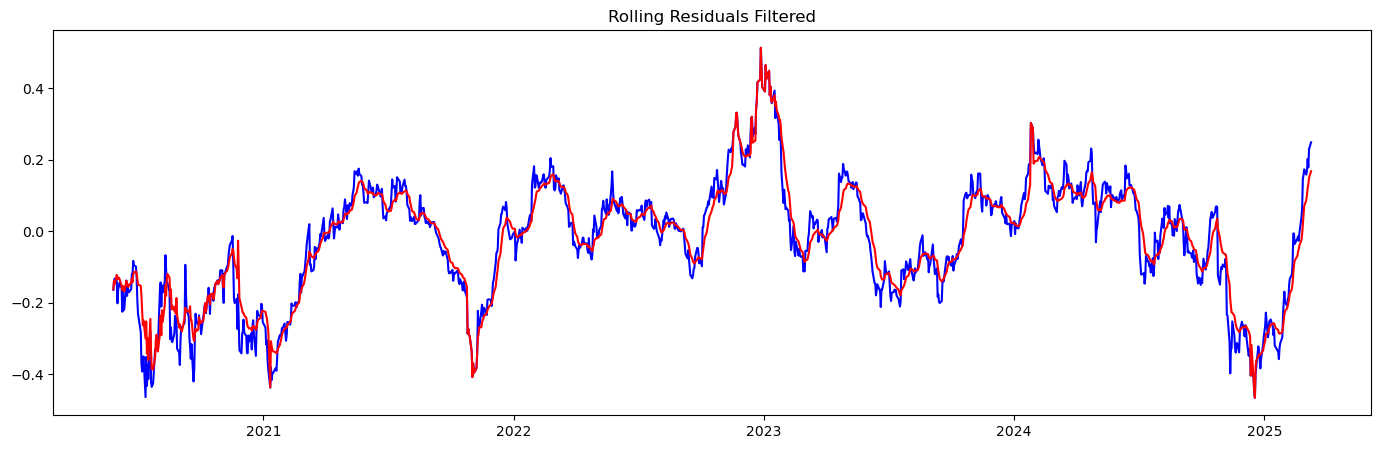

In [28]:
# _ = fa.feature_data(feature_series=mu_series)
# _ = fa.feature_distribution(feature_series=mu_series, feature_name="Rolling Mu")

# _ = fa.feature_data(feature_series=theta_series)
# _ = fa.feature_distribution(feature_series=theta_series, feature_name="Rolling Theta")

# _ = fa.feature_data(feature_series=sigma_series)
# _ = fa.feature_distribution(feature_series=sigma_series, feature_name="Rolling Sigma")

# _ = fa.feature_data(feature_series=half_life_series)
# _ = fa.feature_distribution(feature_series=half_life_series, feature_name="Rolling Half-Life")

# _ = fa.feature_data(feature_series=state_series)
# _ = fa.feature_distribution(feature_series=state_series, feature_name="Rolling State")

# _ = fa.feature_data(feature_series=variance_series)
# _ = fa.feature_distribution(feature_series=variance_series, feature_name="Rolling Variance")

plt.figure(figsize=(17, 5))
plt.plot(residuals_series, label="Residuals", color="blue")
plt.plot(state_series, label="Residuals Filtered", color="red")
plt.title("Rolling Residuals Filtered")
plt.show()